In [65]:
# array object and fast numerics
import numpy as np

# plotting facilities
import pylab

from pyunicorn.timeseries import RecurrencePlot, RecurrenceNetwork
import matplotlib.pyplot as plt

In [4]:
#
#  Functions
#
def logistic_map(x0, r, T):
    """
    Returns a time series of length T using the logistic map
    x_(n+1) = r*x_n(1-x_n) at parameter r and using the initial condition x0.

    INPUT: x0 - Initial condition, 0 <= x0 <= 1
            r - Bifurcation parameter, 0 <= r <= 4
            T - length of the desired time series
    TODO: Cythonize
    """
    #  Initialize the time series array
    timeSeries = np.empty(T)

    timeSeries[0] = x0
    for i in range(1, len(timeSeries)):
        xn = timeSeries[i-1]
        timeSeries[i] = r * xn * (1 - xn)

    return timeSeries

In [5]:
def logistic_map_lyapunov_exponent(timeSeries, r):
    """
    Returns the Lyapunov exponent of the logistic map for different r.

    INPUT: timeSeries - The time series generated by a logistic map
                    r - the bifurcation parameter
    """
    lyap = np.log(r) + (np.log(np.abs(1 - 2 * timeSeries))).mean()

    return lyap

[0.7        0.77259    0.64638077 0.84091885 0.49215578 0.91952362
 0.27224574 0.72891289 0.7269663  0.73023109 0.72473963 0.73393144
 0.71842071 0.74423371 0.70029726 0.77215223 0.64725811 0.83997107
 0.49452998 0.91963992 0.2718867  0.72831074 0.7279792  0.72853575
 0.72760102 0.72916962 0.72653365 0.73095294 0.72351486 0.73595124
 0.71492908 0.7498004  0.69017952 0.786687   0.61737505 0.86906477
 0.4186378  0.89539573 0.3445833  0.83088614 0.51695234 0.91869272
 0.27480807 0.73318274 0.71970735 0.74215981 0.70400838 0.76663215
 0.65819994 0.82767485 0.52473279 0.91749952 0.27847879 0.73921542
 0.70922284 0.75870473 0.67352138 0.80897652 0.56852877 0.90247271
 0.32380984 0.8055429  0.57629157 0.89833673 0.33599515 0.82079376
 0.54114913 0.91352053 0.29064384 0.75849942 0.67391205 0.80847717
 0.56966311 0.901896   0.32551646 0.80774466 0.57132376 0.90103464
 0.32806092 0.81098755 0.56394192 0.90470815 0.31717142 0.79677467
 0.59572131 0.88604091 0.37147753 0.85898018 0.44564914 0.9088

Text(0, 0.5, '$x_n$')

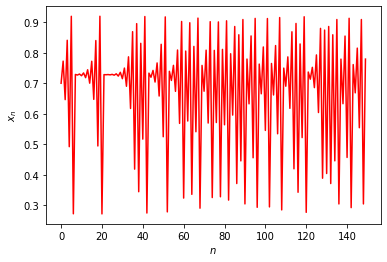

In [6]:
#
#  Settings
#

#  Parameters of logistic map
r = 3.679  # Bifurcation parameter
x0 = 0.7   # Initial value

#  Length of the time series
T = 150

#  Settings for the embedding
DIM = 1  # Embedding dimension
TAU = 0  # Embedding delay

#  Settings for the recurrence plot
EPS = 0.05  # Fixed threshold
RR = 0.05   # Fixed recurrence rate
# Distance metric in phase space ->
# Possible choices ("manhattan","euclidean","supremum")
METRIC = "supremum"

#
#  Main script
#
#  Create a time series using the logistic map
time_series = logistic_map(x0, r, T)

#  Print the time series
print(time_series)
#  Plot the time series
pylab.plot(time_series, "r")
#  You can include LaTex labels...
pylab.xlabel("$n$")
pylab.ylabel("$x_n$")

Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...


Text(0, 0.5, '$n$')

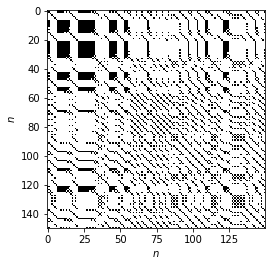

In [70]:
#  Generate a recurrence plot object with fixed recurrence threshold EPS
rp = RecurrencePlot(time_series, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

#  Show the recurrence plot
#pylab.matshow(rp.recurrence_matrix())
#pylab.xlabel("$n$")
#pylab.ylabel("$n$")
#pylab.show()

plt.imshow(rp.recurrence_matrix(), cmap="gray_r")
plt.xlabel("$n$")
plt.ylabel("$n$")
#plt.colorbar()
# Recurrence rate
#print(np.sum(rp.recurrence_matrix().flatten())/(rp.recurrence_matrix().shape[0]*rp.recurrence_matrix().shape[1]))

In [71]:
#  Calculate and print the recurrence rate
print("Recurrence rate:", rp.recurrence_rate())

Recurrence rate: 0.18284444444444445


In [72]:
#  Calculate some standard RQA measures
DET = rp.determinism(l_min=2)
LAM = rp.laminarity(v_min=2)

In [79]:
# The length of a diagonal line in the RP corresponds to the time the system evolves very similar as during
# another time, i.e., a segment of the phase space trajectory runs parallel and within an ε-tube of another
# segment of the phase space trajectory. Deterministic systems are often characterised by repeated similar
# state evolution (corresponding to a local predictability), yielding in a large number of diagonal lines in
# the RP. In contrast, systems with independent subsequent values, like white noise, have RPs with mostly
# single points. T

# Determinism : This measure quantifies the predictability of a system

# Recurrence Rate: measures the fraction of recurrence points in a RP and,
# hence, gives the mean probability of recurrences in the
# system.

# Transitivity: This measure is closely related with the effective degrees of freedom of the system’s dynamics and can be used to obtain an easily calculable generalization
# of a fractal dimension [Donner et al., 2011b; Donges et al., 2012]. Specifically, high (low)
# transitivity values indicate a low (high) dimensionality of the observed dynamics.

# Trapping Time:  In a similar way as diagonal line structures, non-interrupted vertical line structures
# formed by recurrent state pairs in a recurrence plot indicate that a system’s state changes
# slowly with time [Marwan et al., 2002].


# Low TT values generally indicate fast changes of the system’s state, whereas high values
# correspond to slow changes


print("Determinism:", DET)

print("Laminarity:", LAM)

#  Generate a recurrence plot object with fixed recurrence rate RR
rp = RecurrencePlot(time_series, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, recurrence_rate=RR)

Determinism: 0.7084188911631579
Laminarity: 0.22617987533191294
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


In [74]:
#  Calculate and print the recurrence rate again to check if it worked...
RR = rp.recurrence_rate()
print("Recurrence rate:", RR)

Recurrence rate: 0.04995555555555556


In [75]:
#  Calculate some standard RQA measures
DET = rp.determinism(l_min=2)
LAM = rp.laminarity(v_min=2)

In [76]:
print("Determinism:", DET)
print("Laminarity:", LAM)

Determinism: 0.7084188911631579
Laminarity: 0.22617987533191294


In [77]:
#  Generate a recurrence network at fixed recurrence rate
rn = RecurrenceNetwork(time_series, dim=DIM, tau=TAU, metric=METRIC,
                       normalize=False, recurrence_rate=RR)

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


In [81]:
#  Calculate average path length, transitivity and assortativity
L = rn.average_path_length()
T = rn.transitivity()
C = rn.global_clustering()
R = rn.assortativity()
TT = rn.average_vertlength()

print("Average path length:", L)
print("Transitivity:", T)
print("Global clustering:", C)
print("Assortativity:", R)
print("Trapping Time", TT)

Calculating average (weighted) shortest path length...
Average path length: 5.491067884080985
Transitivity: 0.7856664434025452
Global clustering: 0.6575949682126153
Assortativity: 0.8827093408391801
Trapping Time 5.644444443190124


In [98]:
# Source : https://arxiv.org/pdf/1007.2215.pdf

# Sliding window RQA analysis
# Choosing the representative time of sliding window: A better choice is therefore
# to select the centre of the window as the current time point of the RQA. Then the RQA considers states in
# the past and in the future. If strict causality is required (crucial when attempting to detect subtle changes
# in the dynamics just prior the onset of dramatic state changes), it might be even useful to select the end
# point of the window as the current time point of the RQA (using embedding we have to add (m−1)τ −1).

# By conserving the recurrence rate RR = 0.05, we ensure
# that the results obtained for all four variables and three recurrence measures are quantitatively
# comparable over time.

# We will be following https://arxiv.org/pdf/1801.09412.pdf 
# They have used only three measures which are basic for RQA, i.e.
# 1. Determinism:  which measures the predictability of the system
# 2. Trapping Time:This measures whether the states change slow or fast with time, 
#                  high values mean the system is trapped in a particular state for long time
# 3. Transitivity: This measures the dimensionality, and hence the nature of dynamics, 
#                  high values mean low dynamics

win = 50
RR=0.05
dd_rqa = np.zeros((time_series.shape[0]-win))
tt_rqa = np.zeros((time_series.shape[0]-win))
tr_rqa = np.zeros((time_series.shape[0]-win))
time = np.arange(int(win/2),time_series.shape[0]-int(win/2))
# sliding analysis
for i in range(time_series.shape[0]-win):
    rp = RecurrencePlot(time_series[i:i+win], dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, recurrence_rate=RR)
    dd_rqa[i] = rp.determinism(l_min=2)
    rn = RecurrenceNetwork(time_series[i:i+win], dim=DIM, tau=TAU, metric=METRIC,
                       normalize=False, recurrence_rate=RR)
    tt_rqa[i] = rn.average_vertlength()
    tr_rqa[i] = rn.transitivity()
    if np.mod(i,10)==0:
        print(i)

#print(time_series.shape)

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
0
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Calculating re

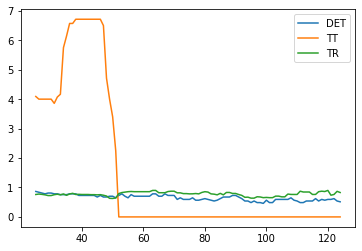

In [100]:
plt.plot(time, dd_rqa, label="DET")
plt.plot(time, tt_rqa, label="TT")
plt.plot(time, tr_rqa, label="TR")
plt.legend()
# Recurrence Rate is kind of filter, lets say enso happens once in 2-7 years, 
# monsoon is an interannual phenomena